In [4]:
%matplotlib qt

from qncmbe.refl_fit.refl_fit import *
import numpy as np

import os

# Set up materials

In [2]:
GaAs = Material('GaAs')
AlAs = Material('AlAs')

# Refractive indices fitted to XRD
GaAs.set_N_at_wavelength('950.3', 3.7575 - 0.1070j)
GaAs.set_N_at_wavelength('469.5', 4.667 - 1.594j)

AlAs.set_N_at_wavelength('950.3', 3.047 - 0.00j)
AlAs.set_N_at_wavelength('469.5', 3.7341 - 0.1022j)

# Get raw data

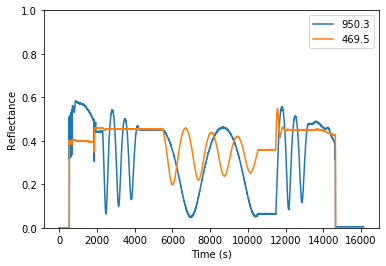

In [5]:
growth = 'G0641'

filepath = f'\\\\insitu1.nexus.uwaterloo.ca\\QNC_MBE_Data\\ZW-XP1\\{growth}\\{growth}_IS4K Refl.txt'

raw_data = np.genfromtxt(filepath, skip_header = 3, usecols = (0,1,2))

t = raw_data[:,0]*3600*24
R = {'950.3': raw_data[:,1], '469.5': raw_data[:,2]}

t -= t[0]

fig, ax = plt.subplots()

for wvln in R:
    ax.plot(t, R[wvln], label = wvln)

ax.set_xlabel('Time (s)')
ax.set_ylabel('Reflectance')
ax.set_ylim([0,1])

ax.legend()

# Set up structure

In [4]:
struct = Structure(substrate = GaAs)

struct.set_refl_data(t, R)
struct.use_angstroms_for_structure() #Use angstroms for structure but nm for wavelength

# Add layers: name, material, thickness, layer growth time, start time in the reflectance data
struct.add_layer('GaAs', GaAs, 1.8, 2303, 4214)
#struct.add_layer('AlAs', AlAs, 0.4513*5183*0.95, 5183*0.95, 5499)
#struct.add_layer('GaAs2', GaAs, 1500*1.8, 1500, 11477)

# Fits with n,k fixed

<IPython.core.display.Javascript object>


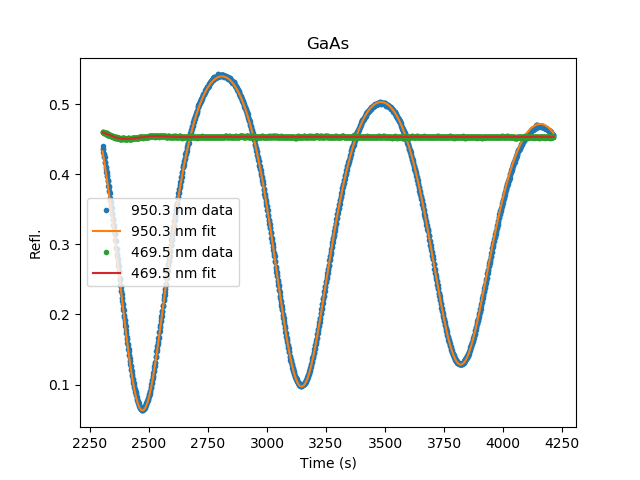

------------------------------
Layer: GaAs

Wavelength = 950.3 nm
N = 3.75750-0.10700j (Fixed)
Ns = 2.68039-2.61974j (Initial guess: 1.00000+0.00000j)
G = 1.87666 Å/s (4.25906 % away from initial guess of 1.80000 Å/s)
s = 0.91189 (Initial guess: 1.00000)

Wavelength = 469.5 nm
N = 4.66700-1.59400j (Fixed)
Ns = 4.71075-1.67267j (Initial guess: 1.00000+0.00000j)
G = 1.94453 Å/s (8.02937 % away from initial guess of 1.80000 Å/s)
s = 0.98262 (Initial guess: 1.00000)
------------------------------



In [5]:
struct.set_fit_type('fix nk')

struct.calc_refl_fits()

struct.display_fit_results()

In [6]:
struct.print_growth_rate_summary()

------------------------------
Layer: GaAs
Wavelength = 950.3 nm
G = 1.87666 Å/s (4.25906 % away from initial guess of 1.80000 Å/s)
Wavelength = 469.5 nm
G = 1.94453 Å/s (8.02937 % away from initial guess of 1.80000 Å/s)
------------------------------

